# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
!pip install citipy

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [50]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [51]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a3ce22e55582bde8a2988a3345e2c8d6"

# Lists for DataFrame
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# Set Count Quantities 
count_one = 0
set_one = 1

# Create DataFrame Columns
for city in cities:
    
    try:
        TestCity = url + "&q=" + city
        response = requests.get(TestCity).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("Skipping no city found")

Processing Record 1 of Set 1 | isangel
Processing Record 2 of Set 1 | angoche
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | puerto ayora
Skipping no city found
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | hajduboszormeny
Processing Record 8 of Set 1 | nizwa
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | gamba
Processing Record 18 of Set 1 | punta arenas
Skipping no city found
Processing Record 19 of Set 1 | albesti
Processing Record 20 of Set 1 | kiama
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | inirida
Skipping no city found
Processing Record 2

Processing Record 41 of Set 4 | shingu
Skipping no city found
Processing Record 42 of Set 4 | san ramon de la nueva oran
Processing Record 43 of Set 4 | la cruz
Processing Record 44 of Set 4 | chibombo
Processing Record 45 of Set 4 | atar
Processing Record 46 of Set 4 | hamilton
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | padang
Skipping no city found
Processing Record 49 of Set 4 | collie
Processing Record 1 of Set 5 | drezdenko
Processing Record 2 of Set 5 | praia da vitoria
Skipping no city found
Processing Record 3 of Set 5 | tual
Processing Record 4 of Set 5 | ikom
Processing Record 5 of Set 5 | filimonovo
Processing Record 6 of Set 5 | hobyo
Skipping no city found
Processing Record 7 of Set 5 | yerbogachen
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | road town
Processing Record 10 of Set 5 | tazovskiy
Processing Record 11 of Set 5 | estevan
Processing Record 12 of Set 5 | bilma
Processing Record 13 of Set 5 | torbay
Process

Processing Record 38 of Set 8 | half moon bay
Skipping no city found
Processing Record 39 of Set 8 | bamnet narong
Processing Record 40 of Set 8 | tromso
Processing Record 41 of Set 8 | pangody
Processing Record 42 of Set 8 | den helder
Processing Record 43 of Set 8 | progreso
Processing Record 44 of Set 8 | sakata
Processing Record 45 of Set 8 | chake chake
Processing Record 46 of Set 8 | yelkhovka
Processing Record 47 of Set 8 | riyadh
Processing Record 48 of Set 8 | shebalino
Processing Record 49 of Set 8 | alagoinhas
Processing Record 1 of Set 9 | villamontes
Processing Record 2 of Set 9 | pisco
Processing Record 3 of Set 9 | korla
Processing Record 4 of Set 9 | ulaangom
Processing Record 5 of Set 9 | anadyr
Processing Record 6 of Set 9 | poronaysk
Skipping no city found
Processing Record 7 of Set 9 | deputatskiy
Processing Record 8 of Set 9 | xiaolingwei
Processing Record 9 of Set 9 | damascus
Skipping no city found
Processing Record 10 of Set 9 | bontang
Skipping no city found
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
# Create Dictionary for DataFrame

weatherdictionary = {"City":city_two, "Cloudiness":cloudinesses, "Country":countries, "Date":dates, 
                     "Humidity":humidities, "Lat":lats, "Lng":lngs, "Max Temp":max_temps,"Wind Speed":wind_speeds}

# Create DataFrame
weatherdataframe = pd.DataFrame(weatherdictionary)
weatherdataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,isangel,75,VU,1591234637,88,-19.55,169.27,80.60,9.17
1,angoche,16,MZ,1591234234,84,-16.23,39.91,70.86,9.06
2,pevek,21,RU,1591234638,72,69.70,170.31,41.43,6.06
3,leningradskiy,9,RU,1591234192,64,69.38,178.42,42.71,6.89
4,puerto ayora,18,EC,1591234180,93,-0.74,-90.35,73.99,3.00


In [59]:
# Export City Data Into a CSV

weatherdataframe.to_csv("output.csv")
weatherdataframe.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [62]:
#  Get the indices of cities that have humidity over 100%.

weatherdataframe.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,554.000000,5.540000e+02,554.000000,554.000000,554.000000,554.000000,554.000000
mean,50.709386,1.591235e+09,69.741877,21.152130,15.785162,67.172112,7.782292
std,39.875353,2.304370e+02,22.175369,32.111107,91.043067,14.623584,5.069334
min,0.000000,1.591234e+09,1.000000,-54.800000,-179.170000,25.680000,0.310000
25%,6.000000,1.591234e+09,58.000000,-5.775000,-64.122500,55.400000,3.710000
50%,48.500000,1.591235e+09,74.500000,26.010000,22.825000,69.465000,6.640000
75%,94.750000,1.591235e+09,87.000000,47.627500,95.395000,78.800000,10.935000
max,100.000000,1.591235e+09,100.000000,78.220000,179.320000,102.200000,28.700000


In [55]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [56]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

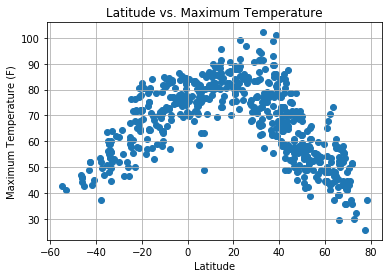

In [71]:
plt.scatter(weatherdataframe["Lat"],weatherdataframe["Max Temp"])
plt.title("Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid(True)
plt.savefig("figure1.png")
plt.show()

## Latitude vs. Humidity Plot

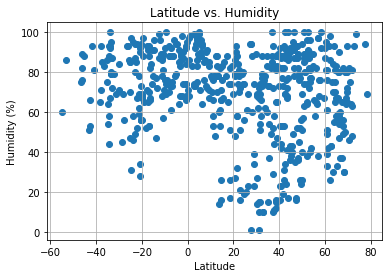

In [81]:
plt.scatter(weatherdataframe["Lat"],weatherdataframe["Humidity"])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("figure2.png")
plt.show()

## Latitude vs. Cloudiness Plot

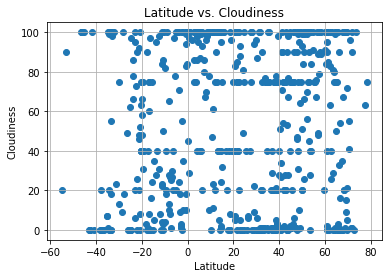

In [80]:
plt.scatter(weatherdataframe["Lat"],weatherdataframe["Cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("figure3.png")
plt.show()

## Latitude vs. Wind Speed Plot

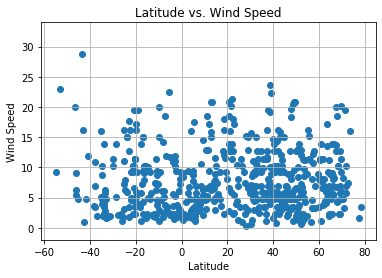

In [79]:
plt.scatter(weatherdataframe["Lat"],weatherdataframe["Wind Speed"])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(-2, 34)
plt.grid(True)
plt.savefig("figure4.png")
plt.show()

## Data Analysis

## Linear Regression

In [57]:
# OPTIONAL: Create a function to create Linear Regression plots

In [58]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression